## Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('data_academic_performance.xlsx')

In [4]:
df.sample(10)

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
11011,SB11201320566370,F,Incomplete technical or technological,Complete professional education,Operator,Auxiliary or Administrative,Stratum 1,Level 2,Three,NaN,...,55,12,76,132,137,35,2,2,2,2
5941,SB11201320072685,M,Complete primary,Complete primary,Independent,Home,Stratum 2,Level 2,Four,NaN,...,45,64,8,98,155,65,4,3,2,1
7415,SB11201320180860,M,Complete professional education,Complete professional education,Executive,Executive,Stratum 3,It is not classified by the SISBEN,Three,NaN,...,88,99,78,158,195,98,5,4,4,4
7613,SB11201320194327,F,Complete professional education,Complete technique or technology,Small entrepreneur,Home,Stratum 3,It is not classified by the SISBEN,Four,NaN,...,24,75,70,143,156,65,4,3,4,2
4623,SB11201310051314,M,Incomplete Secundary,Complete professional education,0,Auxiliary or Administrative,Stratum 3,It is not classified by the SISBEN,Five,NaN,...,95,91,56,194,183,93,5,4,3,2
3636,SB11201220477664,M,Incomplete primary,Complete Secundary,Operator,Operator,Stratum 2,Level 2,Five,NaN,...,82,87,20,82,164,76,4,4,1,2
11827,SB11201420125866,M,Complete Secundary,Complete technique or technology,Operator,Auxiliary or Administrative,Stratum 1,Level 1,Four,NaN,...,29,77,6,151,146,50,3,3,1,4
9319,SB11201320330566,F,Complete professional education,Complete technique or technology,Executive,Home,Stratum 2,It is not classified by the SISBEN,Three,NaN,...,79,86,97,97,179,90,5,4,4,3
1741,SB11201220255956,M,Complete professional education,Complete professional education,Executive,Small entrepreneur,Stratum 2,Level 2,Four,NaN,...,31,66,16,160,141,41,3,2,2,2
10254,SB11201320446727,F,Incomplete Secundary,Incomplete primary,Independent professional,Home,Stratum 4,It is not classified by the SISBEN,Three,NaN,...,86,77,75,189,177,89,5,4,2,1


In [5]:
print(f"Nulls:\n{df.isnull().sum()}")
print(f"Duplicates:\n {df.duplicated().sum()}")

Nulls:
COD_S11                 0
GENDER                  0
EDU_FATHER              0
EDU_MOTHER              0
OCC_FATHER              0
OCC_MOTHER              0
STRATUM                 0
SISBEN                  0
PEOPLE_HOUSE            0
Unnamed: 9          12411
INTERNET                0
TV                      0
COMPUTER                0
WASHING_MCH             0
MIC_OVEN                0
CAR                     0
DVD                     0
FRESH                   0
PHONE                   0
MOBILE                  0
REVENUE                 0
JOB                     0
SCHOOL_NAME             0
SCHOOL_NAT              0
SCHOOL_TYPE             0
MAT_S11                 0
CR_S11                  0
CC_S11                  0
BIO_S11                 0
ENG_S11                 0
Cod_SPro                0
UNIVERSITY              0
ACADEMIC_PROGRAM        0
QR_PRO                  0
CR_PRO                  0
CC_PRO                  0
ENG_PRO                 0
WC_PRO                  0
FEP_P

In [6]:
df.drop(columns=['Unnamed: 9'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   COD_S11           12411 non-null  object
 1   GENDER            12411 non-null  object
 2   EDU_FATHER        12411 non-null  object
 3   EDU_MOTHER        12411 non-null  object
 4   OCC_FATHER        12411 non-null  object
 5   OCC_MOTHER        12411 non-null  object
 6   STRATUM           12411 non-null  object
 7   SISBEN            12411 non-null  object
 8   PEOPLE_HOUSE      12411 non-null  object
 9   INTERNET          12411 non-null  object
 10  TV                12411 non-null  object
 11  COMPUTER          12411 non-null  object
 12  WASHING_MCH       12411 non-null  object
 13  MIC_OVEN          12411 non-null  object
 14  CAR               12411 non-null  object
 15  DVD               12411 non-null  object
 16  FRESH             12411 non-null  object
 17  PHONE       

In [8]:
import pandas as pd
import numpy as np

missing_saber_pro = df[df['Cod_SPro'].isna() | (df['Cod_SPro'] == '') | (df['Cod_SPro'] == 0)]

print(f"Number of records with missing SABER PRO IDs: {len(missing_saber_pro)}")
print("\nSample of records with missing SABER PRO IDs:")
print(missing_saber_pro.head())

saber11_duplicates = df[df.duplicated(subset=['COD_S11'], keep=False)]
print(f"\nNumber of records with duplicate SABER 11 IDs: {len(saber11_duplicates)}")
if len(saber11_duplicates) > 0:
    print("\nSample of duplicate SABER 11 ID records:")
    print(saber11_duplicates.sort_values('COD_S11').head())

saberpro_duplicates = df[df.duplicated(subset=['Cod_SPro'], keep=False)]
print(f"\nNumber of records with duplicate SABER PRO IDs: {len(saberpro_duplicates)}")
if len(saberpro_duplicates) > 0:
    print("\nSample of duplicate SABER PRO ID records:")
    print(saberpro_duplicates.sort_values('Cod_SPro').head())

def keep_most_recent_record():
    duplicate_mask = df.duplicated(subset=['Cod_SPro'], keep=False)
    duplicates = df[duplicate_mask].copy()
    non_duplicates = df[~duplicate_mask].copy()
    duplicates['S11_Year'] = duplicates['COD_S11'].str[4:8].astype(int)
    
    keep_rows = []
    for saber_pro_id, group in duplicates.groupby('Cod_SPro'):
        most_recent = group.loc[group['S11_Year'].idxmax()]
        keep_rows.append(most_recent)
    
    filtered_df = pd.concat([non_duplicates, pd.DataFrame(keep_rows)])
    
    if 'S11_Year' in filtered_df.columns:
        filtered_df = filtered_df.drop(columns=['S11_Year'])
    
    return filtered_df
df = keep_most_recent_record()
print(f"Filtered DataFrame shape: {df.shape}")

Number of records with missing SABER PRO IDs: 0

Sample of records with missing SABER PRO IDs:
Empty DataFrame
Columns: [COD_S11, GENDER, EDU_FATHER, EDU_MOTHER, OCC_FATHER, OCC_MOTHER, STRATUM, SISBEN, PEOPLE_HOUSE, INTERNET, TV, COMPUTER, WASHING_MCH, MIC_OVEN, CAR, DVD, FRESH, PHONE, MOBILE, REVENUE, JOB, SCHOOL_NAME, SCHOOL_NAT, SCHOOL_TYPE, MAT_S11, CR_S11, CC_S11, BIO_S11, ENG_S11, Cod_SPro, UNIVERSITY, ACADEMIC_PROGRAM, QR_PRO, CR_PRO, CC_PRO, ENG_PRO, WC_PRO, FEP_PRO, G_SC, PERCENTILE, 2ND_DECILE, QUARTILE, SEL, SEL_IHE]
Index: []

[0 rows x 44 columns]

Number of records with duplicate SABER 11 IDs: 0

Number of records with duplicate SABER PRO IDs: 32

Sample of duplicate SABER PRO ID records:
               COD_S11 GENDER                             EDU_FATHER  \
6524  SB11201320110284      M  Incomplete technical or technological   
2259  SB11201220313289      M                                      0   
8035  SB11201320225581      F      Incomplete Professional Education   

In [9]:
df.rename(columns={'MAT_S11': 'Math_S11',
                   'CR_S11': 'Critical Reading_S11', 
                   'CC_S11': 'Citizen Competencies_S11',
                   'BIO_S11': 'Biology_S11', 
                   'ENG_S11': 'English_S11',
                   'QR_PRO': 'Quantitative Reasoning_PRO',
                   'CR_PRO': 'Critical Reading_PRO',
                   'CC_PRO': 'Citizen Competencies_PRO',
                   'ENG_PRO': 'English_PRO',
                   'WC_PRO': 'Written Communication_PRO',
                   'FEP_PRO': 'Formulation of Engineering Projects_PRO',
                   'SEL': 'Socioeconomic Level',
                   'SEL_IHE': 'Socioeconomic Level of The Institution of Higher Education'}, inplace=True)

In [10]:
df.describe()

,Math_S11,Critical Reading_S11,Citizen Competencies_S11,Biology_S11,English_S11,Quantitative Reasoning_PRO,Critical Reading_PRO,Citizen Competencies_PRO,English_PRO,Written Communication_PRO,Formulation of Engineering Projects_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,Socioeconomic Level,Socioeconomic Level of The Institution of Higher Education
count,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000
mean,64.326261,60.782896,60.709238,63.958935,61.804599,77.419766,62.214603,59.200726,67.504316,53.723921,145.495200,162.724002,68.461880,3.886325,3.189351,2.598790,2.409359
std,11.876539,10.026175,10.121873,11.155950,14.300620,22.678590,27.657494,28.989655,25.488274,29.993318,40.131322,23.109625,25.862181,1.248166,0.978822,1.111929,0.926930
min,26.000000,24.000000,0.000000,11.000000,26.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,56.000000,54.000000,54.000000,56.000000,50.000000,65.000000,42.000000,36.000000,51.000000,28.000000,124.000000,147.000000,51.000000,3.000000,3.000000,2.000000,2.000000
50%,64.000000,61.000000,60.000000,64.000000,59.000000,85.000000,67.000000,65.000000,74.000000,56.000000,153.000000,163.000000,75.000000,4.000000,4.000000,2.000000,2.000000
75%,72.000000,67.000000,67.000000,71.000000,72.000000,96.000000,86.000000,85.000000,88.000000,80.000000,174.000000,179.000000,90.000000,5.000000,4.000000,4.000000,3.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,300.000000,247.000000,100.000000,5.000000,4.000000,4.000000,4.000000


In [11]:
numeric_columns = [
    "Math_S11", "Critical Reading_S11", "Citizen Competencies_S11", "Biology_S11", "English_S11",
    "Quantitative Reasoning_PRO", "Critical Reading_PRO", "Citizen Competencies_PRO", "English_PRO",
    "Written Communication_PRO", "Formulation of Engineering Projects_PRO", "PERCENTILE",
    "2ND_DECILE", "QUARTILE", "Socioeconomic Level",
    "Socioeconomic Level of The Institution of Higher Education"
]

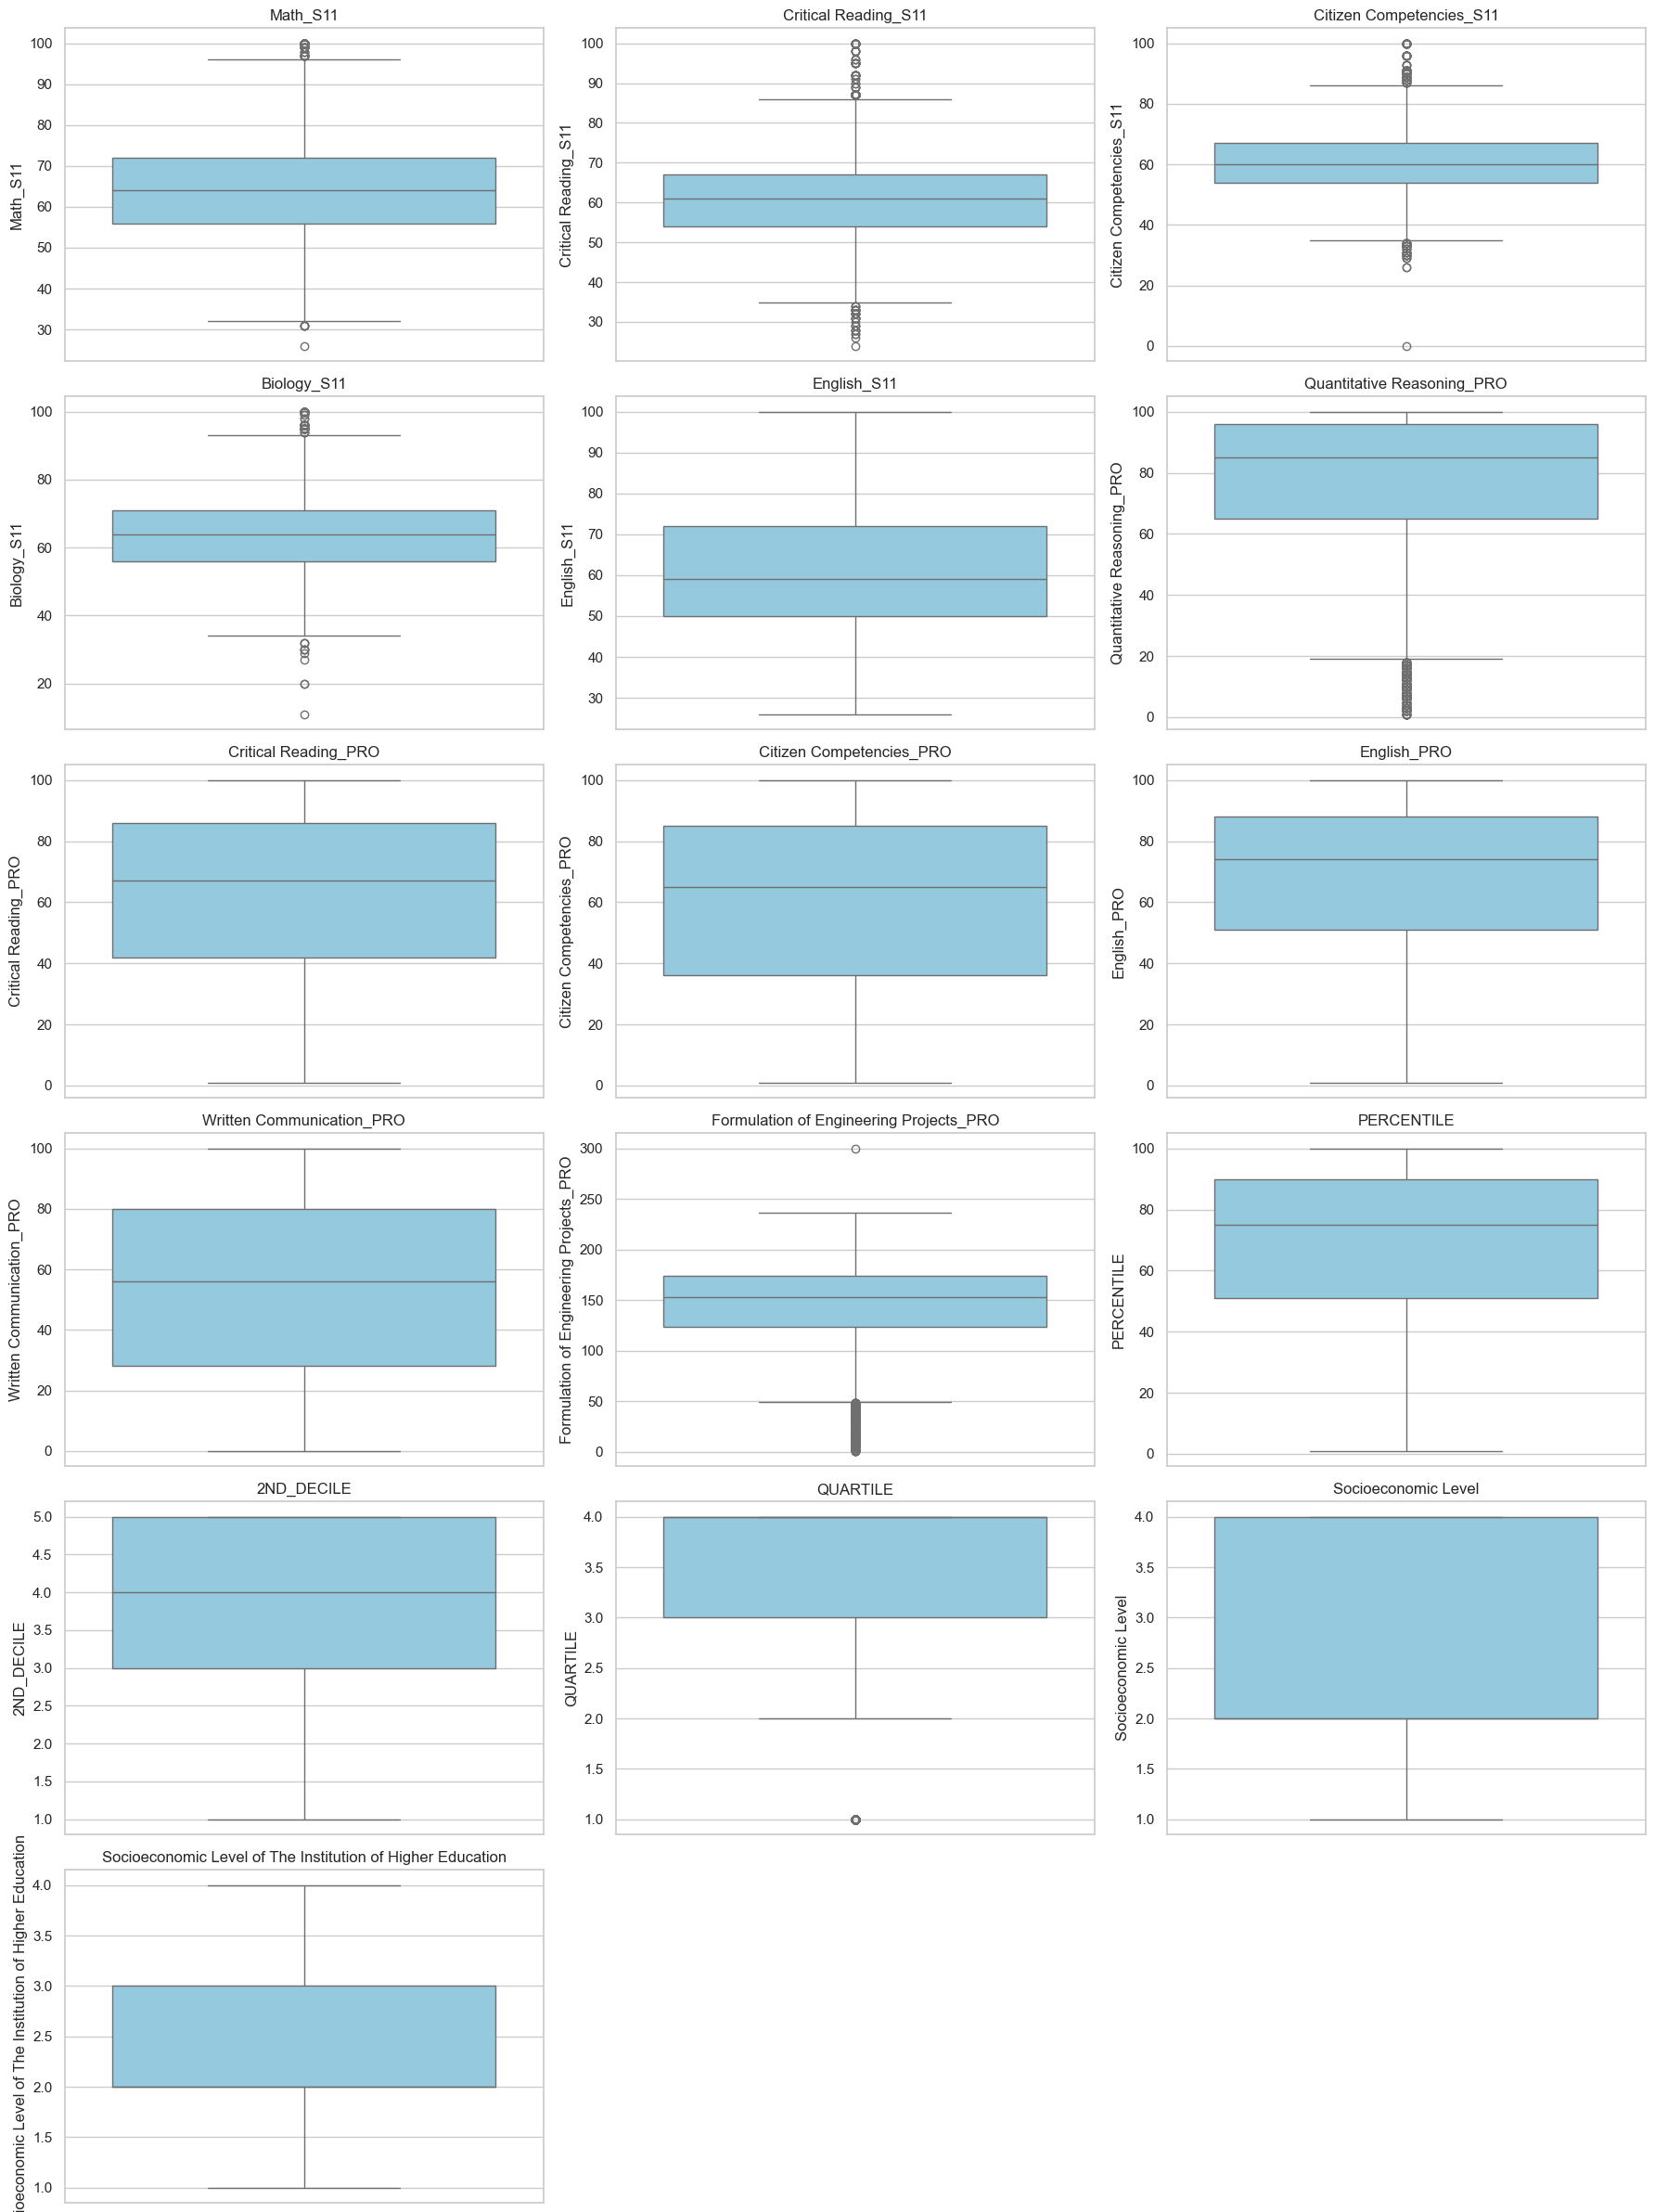

In [12]:
sns.set(style="whitegrid")

def plot_boxplots(df, numeric_columns):
    num_cols = len(numeric_columns)
    num_rows = (num_cols + 2) // 3  # Adjust rows based on number of plots

    plt.figure(figsize=(18, num_rows * 4))

    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(data=df, y=col, color="skyblue")
        plt.title(col)
        plt.tight_layout()

    plt.show()

plot_boxplots(df, numeric_columns)


In [13]:
import pandas as pd
from functools import reduce

def get_unique_value_counts_df(df, columns):
    value_counts_dfs = []
    
    for col in columns:
        counts_df = (
            df[col]
            .value_counts(dropna=True)
            .reset_index()
            .rename(columns={'index': f'{col}', col: f'{col}_COUNT'})
        )
        value_counts_dfs.append(counts_df)
   
    merged_df = pd.concat(value_counts_dfs, axis=1)

    return merged_df


In [14]:
columns_to_check = ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER']
nan_counts = df[columns_to_check].isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
EDU_FATHER    0
EDU_MOTHER    0
OCC_FATHER    0
OCC_MOTHER    0
dtype: int64


In [15]:
get_unique_value_counts_df(df, ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'])


,EDU_FATHER_COUNT,count,EDU_MOTHER_COUNT,count,OCC_FATHER_COUNT,count,OCC_MOTHER_COUNT,count
0,Complete professional education,3015,Complete Secundary,3106,Independent,2907,Home,4650
1,Complete Secundary,2842,Complete professional education,3059,Technical or professional level employee,1802,Technical or professional level employee,1795
2,Complete technique or technology,1193,Complete technique or technology,1493,Operator,1537,Independent,1107
3,Incomplete Secundary,1091,Incomplete Secundary,1056,Other occupation,1087,Auxiliary or Administrative,846
4,Postgraduate education,1084,Postgraduate education,995,Executive,1076,Executive,793
5,Complete primary,823,Complete primary,712,0,928,Independent professional,715
6,Incomplete primary,731,Incomplete primary,538,Independent professional,914,Operator,684
7,Incomplete Professional Education,425,Incomplete Professional Education,502,Small entrepreneur,692,Other occupation,607
8,Not sure,407,0,380,Retired,532,Small entrepreneur,492
9,0,384,Incomplete technical or technological,341,Entrepreneur,471,0,306


In [16]:
df['EDU_FATHER'] = df['EDU_FATHER'].apply(lambda x: 'Unknown' if str(x).strip().lower() in ['0', 'not sure'] else x)
df['EDU_MOTHER'] = df['EDU_MOTHER'].apply(lambda x: 'Unknown' if str(x).strip().lower() in ['0', 'not sure'] else x)

df['EDU_FATHER'] = df['EDU_FATHER'].apply(lambda x: 'No Education' if str(x).strip().lower() in ['ninguno', 'ninguno'] else x)
df['EDU_MOTHER'] = df['EDU_MOTHER'].apply(lambda x: 'No Education' if str(x).strip().lower() in ['ninguno', 'ninguno'] else x)

df['OCC_FATHER'] = df['OCC_FATHER'].apply(lambda x: 'Unknown' if str(x).strip() == '0' else x)
df['OCC_MOTHER'] = df['OCC_MOTHER'].apply(lambda x: 'Unknown' if str(x).strip() == '0' else x)


In [17]:
get_unique_value_counts_df(df, ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'])

,EDU_FATHER_COUNT,count,EDU_MOTHER_COUNT,count,OCC_FATHER_COUNT,count,OCC_MOTHER_COUNT,count
0,Complete professional education,3015.0,Complete Secundary,3106.0,Independent,2907,Home,4650
1,Complete Secundary,2842.0,Complete professional education,3059.0,Technical or professional level employee,1802,Technical or professional level employee,1795
2,Complete technique or technology,1193.0,Complete technique or technology,1493.0,Operator,1537,Independent,1107
3,Incomplete Secundary,1091.0,Incomplete Secundary,1056.0,Other occupation,1087,Auxiliary or Administrative,846
4,Postgraduate education,1084.0,Postgraduate education,995.0,Executive,1076,Executive,793
5,Complete primary,823.0,Complete primary,712.0,Unknown,928,Independent professional,715
6,Unknown,791.0,Unknown,559.0,Independent professional,914,Operator,684
7,Incomplete primary,731.0,Incomplete primary,538.0,Small entrepreneur,692,Other occupation,607
8,Incomplete Professional Education,425.0,Incomplete Professional Education,502.0,Retired,532,Small entrepreneur,492
9,Incomplete technical or technological,277.0,Incomplete technical or technological,341.0,Entrepreneur,471,Unknown,306


In [18]:
get_unique_value_counts_df(df, ['SISBEN','STRATUM'])

,SISBEN_COUNT,count,STRATUM_COUNT,count
0,It is not classified by the SISBEN,7521.0,Stratum 3,4038
1,Level 2,2118.0,Stratum 2,4026
2,Level 1,2056.0,Stratum 1,1707
3,Level 3,583.0,Stratum 4,1575
4,Esta clasificada en otro Level del SISBEN,96.0,Stratum 5,632
5,0,21.0,Stratum 6,403
6,NaN,NaN,0,14


In [19]:
def handle_sisben(x):
    if pd.isna(x) or x == 0:
        return 'Unknown'
    if isinstance(x, str):
        x = x.strip().lower()
        if x == '0' or 'it is not classified by the sisben' in x or 'esta clasificada en otro level del sisben' in x:
            return 'Unknown'
    return x

def handle_stratum(x):
    if pd.isna(x) or x == 0:
        return 'Unknown'
    if isinstance(x, str) and x.strip() == '0':
        return 'Unknown'
    return x

df['SISBEN'] = df['SISBEN'].apply(handle_sisben)
df['STRATUM'] = df['STRATUM'].apply(handle_stratum)

In [20]:
get_unique_value_counts_df(df, ['SISBEN','STRATUM'])

,SISBEN_COUNT,count,STRATUM_COUNT,count
0,Unknown,7638.0,Stratum 3,4038
1,level 2,2118.0,Stratum 2,4026
2,level 1,2056.0,Stratum 1,1707
3,level 3,583.0,Stratum 4,1575
4,NaN,NaN,Stratum 5,632
5,NaN,NaN,Stratum 6,403
6,NaN,NaN,Unknown,14


In [21]:
get_unique_value_counts_df(df, ['REVENUE', 'JOB','SCHOOL_TYPE','PEOPLE_HOUSE'])

,REVENUE_COUNT,count,JOB_COUNT,count,SCHOOL_TYPE_COUNT,count,PEOPLE_HOUSE_COUNT,count
0,Between 1 and less than 2 LMMW,3867.0,No,11901.0,ACADEMIC,7823.0,Four,4763
1,Between 2 and less than 3 LMMW,2782.0,"Yes, less than 20 hours per week",230.0,TECHNICAL/ACADEMIC,3509.0,Five,2867
2,Between 3 and less than 5 LMMW,2235.0,"Yes, 20 hours or more per week",134.0,TECHNICAL,1058.0,Three,2341
3,less than 1 LMMW,1037.0,0,130.0,Not apply,5.0,Six,1088
4,Between 5 and less than 7 LMMW,971.0,NaN,NaN,NaN,NaN,Two,590
5,10 or more LMMW,718.0,NaN,NaN,NaN,NaN,Seven,372
6,Between 7 and less than 10 LMMW,509.0,NaN,NaN,NaN,NaN,Eight,163
7,0,276.0,NaN,NaN,NaN,NaN,Nueve,74
8,NaN,NaN,NaN,NaN,NaN,NaN,Ten,52
9,NaN,NaN,NaN,NaN,NaN,NaN,Twelve or more,32


In [22]:
df['JOB'] = df['JOB'].apply(
        lambda x: 'Unknown' if (
            (isinstance(x, str) and x.strip() == '0') or
            x == 0 or
            pd.isna(x)
        ) else x
    )
df['REVENUE'] = df['REVENUE'].apply(
        lambda x: 'Unknown' if (
            (isinstance(x, str) and x.strip() == '0') or
            x == 0 or
            pd.isna(x)
        ) else x
    )

df = df[df['PEOPLE_HOUSE'] != '0']

df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].replace({'Nueve': 'Nine'})

df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].replace({'Once': 'One'})

In [23]:
get_unique_value_counts_df(df, ['REVENUE', 'JOB','SCHOOL_TYPE','PEOPLE_HOUSE'])

,REVENUE_COUNT,count,JOB_COUNT,count,SCHOOL_TYPE_COUNT,count,PEOPLE_HOUSE_COUNT,count
0,Between 1 and less than 2 LMMW,3867.0,No,11901.0,ACADEMIC,7823.0,Four,4763
1,Between 2 and less than 3 LMMW,2782.0,"Yes, less than 20 hours per week",230.0,TECHNICAL/ACADEMIC,3509.0,Five,2867
2,Between 3 and less than 5 LMMW,2235.0,"Yes, 20 hours or more per week",134.0,TECHNICAL,1058.0,Three,2341
3,less than 1 LMMW,1037.0,Unknown,130.0,Not apply,5.0,Six,1088
4,Between 5 and less than 7 LMMW,971.0,NaN,NaN,NaN,NaN,Two,590
5,10 or more LMMW,718.0,NaN,NaN,NaN,NaN,Seven,372
6,Between 7 and less than 10 LMMW,509.0,NaN,NaN,NaN,NaN,Eight,163
7,Unknown,276.0,NaN,NaN,NaN,NaN,Nine,74
8,NaN,NaN,NaN,NaN,NaN,NaN,Ten,52
9,NaN,NaN,NaN,NaN,NaN,NaN,One,32


Encoding

In [24]:

def apply_binning_to_dataframe(df):
    """
    Apply education and occupation binning to the dataframe
    """
    # Make a copy to avoid modifying the original
    result_df = df.copy()
    
    # Apply education binning
    result_df['EDU_FATHER_BIN'] = result_df['EDU_FATHER'].apply(bin_education_level)
    result_df['EDU_MOTHER_BIN'] = result_df['EDU_MOTHER'].apply(bin_education_level)
    
    # Apply occupation binning
    result_df['OCC_FATHER_BIN'] = result_df['OCC_FATHER'].apply(bin_occupation)
    result_df['OCC_MOTHER_BIN'] = result_df['OCC_MOTHER'].apply(bin_occupation)
    
    return result_df


def bin_education_level(education_str):
    """
    Bins education levels into 6 categories:
    0 - No/Unknown Education
    1 - Primary
    2 - Secondary
    3 - Technical/Technological
    4 - University/Professional
    5 - Postgraduate
    """
    # Input already preprocessed
    education = str(education_str)
    
    # 0 - No/Unknown Education
    if 'no education' in education.lower() or 'unknown' in education.lower():
        return 0
        
    # 1 - Primary
    if 'primary' in education.lower():
        return 1
        
    # 2 - Secondary
    if 'secondary' in education.lower():
        return 2
        
    # 3 - Technical/Technological
    if 'techn' in education.lower():
        return 3
        
    # 4 - University/Professional
    if 'professional' in education.lower():
        return 4
        
    # 5 - Postgraduate
    if 'postgraduate' in education.lower():
        return 5
        
    # Default to 0 for any unrecognized values
    return 0

def bin_occupation(occupation_str):
    """
    Bins occupation levels into categories:
    0 - Unknown/Missing
    1 - Home/Retired
    2 - Manual Labor (Operator, Small entrepreneur)
    3 - Administrative/Auxiliary
    4 - Technical/Professional
    5 - Executive/Management
    """
    # Input already preprocessed
    occupation = str(occupation_str)
    # 0 - Unknown/Missing
    if occupation.lower() == 'unknown':
        return 0
        
    # 1 - Home/Retired
    if 'home' in occupation.lower() or 'retired' in occupation.lower():
        return 1
        
    # 2 - Manual Labor
    if 'operator' in occupation.lower() or 'entrepreneur' in occupation.lower():
        return 2
        
    # 3 - Administrative/Auxiliary
    if 'admin' in occupation.lower() or 'auxiliary' in occupation.lower():
        return 3
        
    # 4 - Technical/Professional
    if 'technical' in occupation.lower() or 'professional' in occupation.lower():
        return 4
        
    # 5 - Executive/Management
    if 'executive' in occupation.lower():
        return 5
        
    # Default value for other occupations
    return 0

# Apply binning directly to the dataframe columns
df['EDU_FATHER_BIN'] = df['EDU_FATHER'].apply(bin_education_level)
df['EDU_MOTHER_BIN'] = df['EDU_MOTHER'].apply(bin_education_level)
df['OCC_FATHER_BIN'] = df['OCC_FATHER'].apply(bin_occupation)
df['OCC_MOTHER_BIN'] = df['OCC_MOTHER'].apply(bin_occupation)

# Example usage
# Assuming df is your dataframe with the columns 'EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'
df = apply_binning_to_dataframe(df)


In [25]:
df = df.drop(columns=['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER', 'Cod_SPro', 'COD_S11'])

In [26]:
def frequency_encode(df, column):

    freq = df[column].value_counts(normalize=True)
    return df[column].map(freq)

def one_hot_encode(df, column):
    one_hot = pd.get_dummies(df[column], prefix=column, dtype=int)
    return one_hot


# GENDER
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1}) 

# PEOPLE_HOUSE


df['PEOPLE_HOUSE'] = frequency_encode(df, 'PEOPLE_HOUSE')

# STRATUM, SISBEN
import pandas as pd


one_hot_stratum = one_hot_encode(df, 'STRATUM')
one_hot_sisben = one_hot_encode(df, 'SISBEN')
df = pd.concat([df, one_hot_stratum, one_hot_sisben], axis=1)
df.drop(columns=['STRATUM', 'SISBEN'], inplace=True)

# DEVICES
device_columns = ['DVD', 'FRESH', 'PHONE', 'MOBILE', 'CAR','MIC_OVEN','WASHING_MCH','COMPUTER','TV','INTERNET']
for col in device_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

#REVENUE
one_hot_revenue = one_hot_encode(df, 'REVENUE')
df = pd.concat([df, one_hot_revenue], axis=1)
df.drop(columns=['REVENUE'], inplace=True)

# JOB
one_hot_job = one_hot_encode(df, 'JOB')
df = pd.concat([df, one_hot_job], axis=1)
df.drop(columns=['JOB'], inplace=True)

# SCHOOL_NAME
frequency_encode(df, 'SCHOOL_NAME')
df['SCHOOL_NAME'] = frequency_encode(df, 'SCHOOL_NAME')

# SCHOOL_TYPE
one_hot_school_type = one_hot_encode(df, 'SCHOOL_TYPE')
df = pd.concat([df, one_hot_school_type], axis=1)
df.drop(columns=['SCHOOL_TYPE'], inplace=True)

# SCHOOL_NAT
one_hot_school_nat = one_hot_encode(df, 'SCHOOL_NAT')
df = pd.concat([df, one_hot_school_nat], axis=1)
df.drop(columns=['SCHOOL_NAT'], inplace=True)




In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12395 entries, 0 to 7430
Data columns (total 65 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   GENDER                                                      12395 non-null  int64  
 1   PEOPLE_HOUSE                                                12395 non-null  float64
 2   INTERNET                                                    12395 non-null  int64  
 3   TV                                                          12395 non-null  int64  
 4   COMPUTER                                                    12395 non-null  int64  
 5   WASHING_MCH                                                 12395 non-null  int64  
 6   MIC_OVEN                                                    12395 non-null  int64  
 7   CAR                                                         12395 non-null  int64  
 8   DV

In [28]:
df.describe()

,GENDER,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,FRESH,...,JOB_No,JOB_Unknown,"JOB_Yes, 20 hours or more per week","JOB_Yes, less than 20 hours per week",SCHOOL_TYPE_ACADEMIC,SCHOOL_TYPE_Not apply,SCHOOL_TYPE_TECHNICAL,SCHOOL_TYPE_TECHNICAL/ACADEMIC,SCHOOL_NAT_PRIVATE,SCHOOL_NAT_PUBLIC
count,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,...,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000
mean,0.406293,0.247947,0.785720,0.851553,0.820573,0.619282,0.690520,0.467931,0.751109,0.969342,...,0.960145,0.010488,0.010811,0.018556,0.631142,0.000403,0.085357,0.283098,0.528923,0.471077
std,0.491160,0.123251,0.410338,0.355557,0.383725,0.485583,0.462298,0.498991,0.432388,0.172395,...,0.195626,0.101877,0.103416,0.134956,0.482515,0.020081,0.279423,0.450522,0.499183,0.499183
min,0.000000,0.001694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.188866,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.231303,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.384268,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,0.384268,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the data
# Assuming you have your data in a CSV file named 'education_data.csv'
# If your data is in a different format, adjust accordingly
# df = pd.read_csv('education_data.csv')

# If you already have the data in a DataFrame, you can use that directly
# For demonstration, I'll assume we need to load the data

# Function to handle correlation analysis
def analyze_correlations(df):
    # Target variable
    target = 'G_SC'
    
    # Identify one-hot encoded groups (they share a common prefix)
    one_hot_prefixes = [
        'STRATUM_', 'SISBEN_', 'REVENUE_', 'JOB_', 'SCHOOL_TYPE_', 'SCHOOL_NAT_','EDU_FATHER_', 'EDU_MOTHER_',
        'OCC_FATHER_', 'OCC_MOTHER_'
    ]
    
    # Separate regular features and one-hot features
    one_hot_columns = []
    for prefix in one_hot_prefixes:
        one_hot_columns.extend([col for col in df.columns if col.startswith(prefix)])
    
    # Regular numerical features (excluding one-hot and non-numeric)
    regular_numeric = [col for col in df.columns if col not in one_hot_columns 
                       and col not in ['G_SC','PERCENTILE', '2ND_DECILE', 'QUARTILE', 'Socioeconomic Level',
                                        'Socioeconomic Level of The Institution of Higher Education']
                       and df[col].dtype in ['int64', 'float64']
                       and col != target]
    
    # 1. Correlation of regular numerical features with target
    numeric_corr = df[regular_numeric + [target]].corr()[target].sort_values(ascending=False)
    
    # 2. For one-hot encoded features, we need a different approach
    category_correlations = {}
    
    for prefix in one_hot_prefixes:
        cols = [col for col in df.columns if col.startswith(prefix)]
        if cols:
            # Create a categorical variable from one-hot encodings
            # We'll use the column name as the category value
            cat_values = []
            for _, row in df[cols].iterrows():
                # Find which column has 1 (which category this row belongs to)
                try:
                    cat_col = cols[np.where(row == 1)[0][0]]
                    # Extract category name from column name
                    cat_values.append(cat_col.replace(prefix, ''))
                except IndexError:
                    # Handle case where no category is 1 (shouldn't happen with proper one-hot)
                    cat_values.append('Unknown')
            
            # Create a temporary column with the categorical variable
            temp_col = f"TEMP_{prefix.strip('_')}"
            df[temp_col] = cat_values
            
            # Calculate eta correlation (correlation ratio) using ANOVA
            # This measures association between categorical and numeric variables
            categories = df[temp_col].unique()
            overall_mean = df[target].mean()
            total_variance = ((df[target] - overall_mean) ** 2).sum()
            
            between_group_variance = 0
            for cat in categories:
                cat_values = df[df[temp_col] == cat][target]
                cat_mean = cat_values.mean()
                between_group_variance += len(cat_values) * ((cat_mean - overall_mean) ** 2)
            
            # Correlation ratio (eta squared)
            eta_squared = between_group_variance / total_variance if total_variance > 0 else 0
            category_correlations[prefix.strip('_')] = eta_squared
            
            # Remove temporary column
            df.drop(temp_col, axis=1, inplace=True)
    
    # Plotting
    plt.figure(figsize=(12, 10))
    
    # 1. Top regular features by correlation
    top_n = min(15, len(numeric_corr))
    top_corr = numeric_corr.iloc[:top_n]
    
    plt.subplot(2, 1, 1)
    sns.barplot(x=top_corr.values, y=top_corr.index)
    plt.title(f'Top {top_n} Regular Features by Correlation with G_SC')
    plt.xlabel('Correlation (Pearson)')
    plt.tight_layout()
    
    # 2. Category correlation ratio (sorted)
    plt.subplot(2, 1, 2)
    cat_df = pd.Series(category_correlations).sort_values(ascending=False)
    sns.barplot(x=cat_df.values, y=cat_df.index)
    plt.title('Categorical Features Association with G_SC (Eta Squared)')
    plt.xlabel('Association Strength (Eta Squared)')
    plt.tight_layout()
    
    plt.subplots_adjust(hspace=0.3)
    plt.savefig('correlation_analysis.png')
    plt.close()
    
    # 3. Correlation heatmap for top regular features
    plt.figure(figsize=(12, 10))
    top_features = list(top_corr.iloc[:min(10, len(top_corr))].index) + [target]
    sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of Top Features with G_SC')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    plt.close()
    
    return {
        'regular_correlations': numeric_corr.to_dict(),
        'categorical_associations': category_correlations
    }

# Additional analysis: Test for multicollinearity among PRO and S11 features
def analyze_test_correlations(df):
    # Identify PRO and S11 features
    pro_features = [col for col in df.columns if col.endswith('_PRO')]
    s11_features = [col for col in df.columns if col.endswith('_S11')]
    
    if pro_features and s11_features:
        # Correlation between similar tests (e.g., Critical Reading_PRO vs Critical Reading_S11)
        matched_features = []
        for pro in pro_features:
            base_name = pro.replace('_PRO', '')
            s11_match = f"{base_name}_S11"
            if s11_match in s11_features:
                matched_features.append((pro, s11_match))
        
        if matched_features:
            plt.figure(figsize=(10, 6))
            correlations = []
            labels = []
            
            for pro, s11 in matched_features:
                corr = df[pro].corr(df[s11])
                correlations.append(corr)
                labels.append(pro.replace('_PRO', ''))
            
            sns.barplot(x=correlations, y=labels)
            plt.title('Correlation Between SABER PRO and SABER 11 Matched Tests')
            plt.xlabel('Correlation Coefficient')
            plt.tight_layout()
            plt.savefig('pro_s11_correlations.png')
            plt.close()
            
            # Check how both tests correlate with G_SC
            plt.figure(figsize=(10, 8))
            
            pro_g_corrs = []
            s11_g_corrs = []
            
            for pro, s11 in matched_features:
                pro_g_corrs.append(df[pro].corr(df['G_SC']))
                s11_g_corrs.append(df[s11].corr(df['G_SC']))
            
            # Create a dataframe for grouped bar plot
            corr_df = pd.DataFrame({
                'PRO': pro_g_corrs,
                'S11': s11_g_corrs
            }, index=[name.replace('_PRO', '') for name, _ in matched_features])
            
            corr_df.plot(kind='bar', figsize=(10, 6))
            plt.title('Correlation with G_SC: SABER PRO vs SABER 11')
            plt.xlabel('Test Component')
            plt.ylabel('Correlation with G_SC')
            plt.legend(title='Exam Type')
            plt.tight_layout()
            plt.savefig('pro_s11_g_sc_comparison.png')
            plt.close()
        
    # Full correlation matrix of PRO features
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[pro_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of SABER PRO Features')
    plt.tight_layout()
    plt.savefig('pro_correlation_matrix.png')
    plt.close()

# Main execution
def main():
    try:
    
        results = analyze_correlations(df)
        analyze_test_correlations(df)
        
        # Print key findings
        print("Top 5 numerical features by correlation with G_SC:")
        top_5 = {k: v for k, v in sorted(results['regular_correlations'].items(), 
                                        key=lambda item: abs(item[1]), reverse=True)[:5]}
        for feature, corr in top_5.items():
            print(f"- {feature}: {corr:.4f}")
        
        print("\nCategory association strength with G_SC:")
        for category, strength in sorted(results['categorical_associations'].items(), 
                                         key=lambda item: item[1], reverse=True):
            print(f"- {category}: {strength:.4f}")
        
        print("\nAnalysis complete. Visualizations saved to files.")
        
    except Exception as e:
        print(f"Error during analysis: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

Top 5 numerical features by correlation with G_SC:
- G_SC: 1.0000
- Critical Reading_PRO: 0.7863
- Citizen Competencies_PRO: 0.7578
- English_PRO: 0.7246
- Quantitative Reasoning_PRO: 0.6999

Category association strength with G_SC:
- REVENUE: 0.1115
- STRATUM: 0.1035
- SISBEN: 0.0720
- SCHOOL_NAT: 0.0641
- SCHOOL_TYPE: 0.0319
- EDU_FATHER: 0.0143
- EDU_MOTHER: 0.0123
- OCC_MOTHER: 0.0071
- JOB: 0.0045
- OCC_FATHER: 0.0004

Analysis complete. Visualizations saved to files.


<Figure size 1000x800 with 0 Axes>

Starting G_SC regression analysis...

Dataset overview:
Number of rows: 12395
Number of columns: 65

Missing values in G_SC: 0

Feature set shape after preprocessing: (12395, 50)

Training Gradient Boosting Regressor...

Performing 5-fold cross-validation...
Cross-validation R² scores: [0.60939511 0.63073939 0.61637749 0.54197938 0.62953081]
Mean cross-validation R²: 0.6056 ± 0.0328

Performing hyperparameter tuning...
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}

Model Performance:
Training R²: 0.6303
Test R²: 0.6072
Training RMSE: 14.0657
Test RMSE: 14.4076
Training MAE: 10.7973
Test MAE: 11.1123


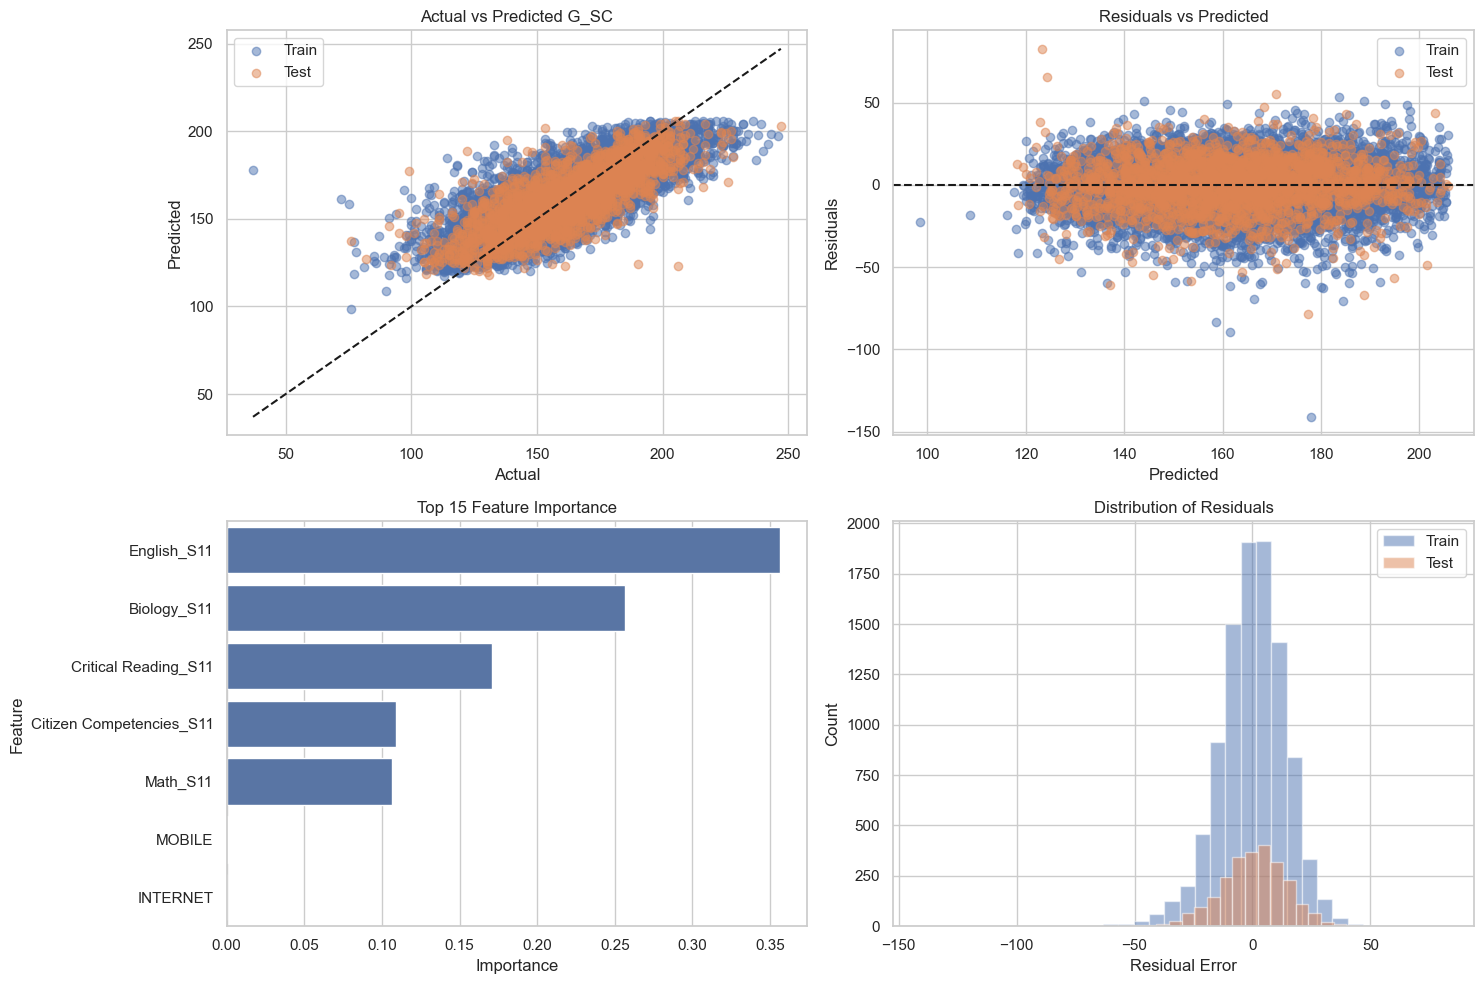

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# from sklearn.feature_selection import SelectFromModel
# import warnings
# warnings.filterwarnings('ignore')
# important_features = [
#     'Math_S11', 'Critical Reading_S11', 'Citizen Competencies_S11', 'Biology_S11', 'English_S11','MOBILE','INTERNET'
# ]
# # Main analysis function
# def analyze_and_model_g_sc():
#     print("Starting G_SC regression analysis...")
    
#     # Check if the DataFrame exists and has the expected columns
#     if 'df' not in globals() or 'G_SC' not in df.columns:
#         print("DataFrame not available or missing G_SC column. Using alternate approach.")
#         # Here we could create synthetic data or use alternative data loading
#         return
    
#     # Display basic info about the dataset
#     print("\nDataset overview:")
#     print(f"Number of rows: {df.shape[0]}")
#     print(f"Number of columns: {df.shape[1]}")
    
#     # Check for missing values in target variable
#     print(f"\nMissing values in G_SC: {df['G_SC'].isna().sum()}")
    
#     # Set target variable
#     y = df['G_SC']
    
#     # Remove target and any non-predictive columns (like PERCENTILE which might be derived from G_SC)
#     columns_to_exclude = ['G_SC', 'PERCENTILE', 'UNIVERSITY','2ND_DECILE','QUARTILE','Socioeconomic Level','Socioeconomic Level of The Institution of Higher Education', 'ACADEMIC_PROGRAM', 'SCHOOL_NAME',
#                           'Quantitative Reasoning_PRO', 'Critical Reading_PRO', 'Citizen Competencies_PRO', 'English_PRO', 'Written Communication_PRO', 'Formulation of Engineering Projects_PRO']
    
#     # Create feature set (X)
#     X = df.drop(columns=[col for col in columns_to_exclude if col in df.columns], errors='ignore')
    
#     # Remove any remaining object columns or convert them
#     object_cols = X.select_dtypes(include=['object']).columns
#     X = X.drop(columns=object_cols, errors='ignore')
    
#     print(f"\nFeature set shape after preprocessing: {X.shape}")
    
#     # Get the most important features
#     important_features_in_X = [col for col in important_features if col in X.columns]
#     X_important = X[important_features]
    
#     # Split the data
#     X_train, X_test, y_train, y_test = train_test_split(
#         X_important, y, test_size=0.2, random_state=43
#     )
    
#     # Scale the features
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     # Create and train the model - starting with Gradient Boosting Regressor
#     print("\nTraining Gradient Boosting Regressor...")
#     gb = GradientBoostingRegressor(random_state=43)
#     gb.fit(X_train_scaled, y_train)
    
#     # Cross-validation
#     print("\nPerforming 5-fold cross-validation...")
#     cv_scores = cross_val_score(gb, X_train_scaled, y_train, cv=5, scoring='r2')
#     print(f"Cross-validation R² scores: {cv_scores}")
#     print(f"Mean cross-validation R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
#     # Hyperparameter tuning
#     print("\nPerforming hyperparameter tuning...")
#     param_grid = {
#         'n_estimators': [100, 200, 300],
#         'learning_rate': [0.01, 0.05, 0.1],
#         'max_depth': [3, 5, 7],
#         'min_samples_split': [2, 5, 10]
#     }
    
#     grid_search = GridSearchCV(
#         GradientBoostingRegressor(random_state=43),
#         param_grid,
#         cv=3,
#         scoring='r2',
#         n_jobs=-1
#     )
    
#     grid_search.fit(X_train_scaled, y_train)
#     best_params = grid_search.best_params_
#     print(f"Best parameters: {best_params}")
    
#     # Train the model with the best parameters
#     best_gb = GradientBoostingRegressor(random_state=42, **best_params)
#     best_gb.fit(X_train_scaled, y_train)
    
#     # Make predictions
#     y_pred_train = best_gb.predict(X_train_scaled)
#     y_pred_test = best_gb.predict(X_test_scaled)
    
#     # Calculate metrics
#     train_r2 = r2_score(y_train, y_pred_train)
#     test_r2 = r2_score(y_test, y_pred_test)
#     train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     train_mae = mean_absolute_error(y_train, y_pred_train)
#     test_mae = mean_absolute_error(y_test, y_pred_test)
    
#     print("\nModel Performance:")
#     print(f"Training R²: {train_r2:.4f}")
#     print(f"Test R²: {test_r2:.4f}")
#     print(f"Training RMSE: {train_rmse:.4f}")
#     print(f"Test RMSE: {test_rmse:.4f}")
#     print(f"Training MAE: {train_mae:.4f}")
#     print(f"Test MAE: {test_mae:.4f}")
    
#     # Calculate feature importance
#     feature_importance = pd.DataFrame({
#         'Feature': important_features,
#         'Importance': best_gb.feature_importances_
#     })
#     feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
#     # Create visualizations
#     plt.figure(figsize=(15, 10))
    
#     # Train vs Test scatter plot
#     plt.subplot(2, 2, 1)
#     plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
#     plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test')
#     plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
#     plt.xlabel('Actual')
#     plt.ylabel('Predicted')
#     plt.title('Actual vs Predicted G_SC')
#     plt.legend()
    
#     # Residuals plot
#     plt.subplot(2, 2, 2)
#     train_residuals = y_train - y_pred_train
#     test_residuals = y_test - y_pred_test
#     plt.scatter(y_pred_train, train_residuals, alpha=0.5, label='Train')
#     plt.scatter(y_pred_test, test_residuals, alpha=0.5, label='Test')
#     plt.axhline(y=0, color='k', linestyle='--')
#     plt.xlabel('Predicted')
#     plt.ylabel('Residuals')
#     plt.title('Residuals vs Predicted')
#     plt.legend()
    
#     # Feature importance plot (top 15)
#     plt.subplot(2, 2, 3)
#     top_features = feature_importance.head(15)
#     sns.barplot(x='Importance', y='Feature', data=top_features)
#     plt.title('Top 15 Feature Importance')
    
#     # Distribution of errors
#     plt.subplot(2, 2, 4)
#     plt.hist(train_residuals, alpha=0.5, bins=30, label='Train')
#     plt.hist(test_residuals, alpha=0.5, bins=30, label='Test')
#     plt.xlabel('Residual Error')
#     plt.ylabel('Count')
#     plt.title('Distribution of Residuals')
#     plt.legend()
    
#     plt.tight_layout()
#     plt.savefig('regression_analysis.png')
#     plt.show()
    
#     # Return the trained model and important features
#     return best_gb, important_features, scaler

# if __name__ == "__main__":
#     analyze_and_model_g_sc()

In [41]:
df.sample(15)

,GENDER,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,FRESH,...,JOB_No,JOB_Unknown,"JOB_Yes, 20 hours or more per week","JOB_Yes, less than 20 hours per week",SCHOOL_TYPE_ACADEMIC,SCHOOL_TYPE_Not apply,SCHOOL_TYPE_TECHNICAL,SCHOOL_TYPE_TECHNICAL/ACADEMIC,SCHOOL_NAT_PRIVATE,SCHOOL_NAT_PUBLIC
1254,0,0.188866,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
9436,1,0.231303,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
9841,0,0.047600,1,1,1,1,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
5066,0,0.231303,1,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,0,1,0
5704,0,0.384268,0,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
5248,0,0.384268,1,1,1,1,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
9608,0,0.030012,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,0,1,0,1
494,1,0.231303,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
12289,1,0.384268,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,1,0,1
1211,1,0.231303,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectFromModel, RFE, RFECV
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

def analyze_and_model_g_sc(df):
    print("Starting improved G_SC regression analysis...")
    
    # Set target variable
    y = df['G_SC']
    
    # Remove university performance indicators to avoid data leakage
    columns_to_exclude = [
        'G_SC', 'PERCENTILE', 'UNIVERSITY', '2ND_DECILE', 'QUARTILE', 
        'Socioeconomic Level of The Institution of Higher Education', 'ACADEMIC_PROGRAM',
        # SABER PRO results (which happen during university)
        'Quantitative Reasoning_PRO', 'Critical Reading_PRO', 'Citizen Competencies_PRO', 
        'English_PRO', 'Written Communication_PRO', 'Formulation of Engineering Projects_PRO'
    ]
    
    # Create feature set (X) - keeping all potential predictors for now
    X = df.drop(columns=[col for col in columns_to_exclude if col in df.columns], errors='ignore')
    
    # Remove any remaining object columns or convert them
    object_cols = X.select_dtypes(include=['object']).columns
    X = X.drop(columns=object_cols, errors='ignore')
    
    print(f"\nFeature set shape after removing university variables: {X.shape}")
    
    # Split the data - use stratified split on socioeconomic level if possible
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=43, 
            stratify=df['Socioeconomic Level'] if 'Socioeconomic Level' in df.columns else None
        )
    except ValueError:
        # Fallback to regular split if stratification fails
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=43
        )
    
    # Feature engineering - adding interaction terms between key SABER 11 components
    print("\nPerforming feature engineering...")
    
    # Check for key features before creating interactions
    s11_features = [col for col in X_train.columns if col.endswith('_S11')]
    
    if len(s11_features) >= 2:
        # Create interactions between SABER 11 components
        for i in range(len(s11_features)):
            for j in range(i+1, len(s11_features)):
                feat1 = s11_features[i]
                feat2 = s11_features[j]
                interaction_name = f"{feat1}_x_{feat2}"
                X_train[interaction_name] = X_train[feat1] * X_train[feat2]
                X_test[interaction_name] = X_test[feat1] * X_test[feat2]
        
        # Add squared terms for main academic features
        for feat in s11_features:
            squared_name = f"{feat}_squared"
            X_train[squared_name] = X_train[feat] ** 2
            X_test[squared_name] = X_test[feat] ** 2
    
    print(f"Feature set shape after engineering: {X_train.shape}")
    
    # Feature selection
    print("\nPerforming feature selection...")
    
    # First apply Random Forest for initial feature importance
    rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_selector.fit(X_train, y_train)
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_selector.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Select top 80% of cumulative importance
    cum_importance = feature_importance['Importance'].cumsum()
    importance_threshold = cum_importance[cum_importance <= 0.80].max()
    selected_features = feature_importance[feature_importance['Importance'] >= importance_threshold/len(feature_importance)]
    
    print(f"Selected {len(selected_features)} features with cumulative importance of ~80%")
    
    # Keep only selected features
    X_train_selected = X_train[selected_features['Feature']]
    X_test_selected = X_test[selected_features['Feature']]
    
    # Create preprocessing pipeline with robust scaling
    preprocessor = RobustScaler()
    X_train_scaled = preprocessor.fit_transform(X_train_selected)
    X_test_scaled = preprocessor.transform(X_test_selected)
    
    print("\nTraining multiple models...")
    # Create multiple base models
    models = {
        'XGBoost': xgb.XGBRegressor(random_state=42, n_estimators=200),
        'GradientBoosting': GradientBoostingRegressor(random_state=42, n_estimators=200),
        'RandomForest': RandomForestRegressor(random_state=42, n_estimators=200),
        'ElasticNet': ElasticNet(random_state=42, alpha=0.1, l1_ratio=0.5),
    }
    
    # Train and evaluate each model
    results = {}
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
        
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        
        results[name] = {
            'model': model,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'test_rmse': test_rmse
        }
        
        print(f"{name}: Train R² = {train_r2:.4f}, Test R² = {test_r2:.4f}, Test RMSE = {test_rmse:.4f}")
    
    # Find the best performing model
    best_model_name = max(results, key=lambda x: results[x]['test_r2'])
    best_model = results[best_model_name]['model']
    print(f"\nBest model: {best_model_name}")
    
    # Perform hyperparameter tuning on the best model
    print("\nPerforming hyperparameter tuning on the best model...")
    
    if best_model_name == 'XGBoost':
        param_grid = {
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7, 9],
            'min_child_weight': [1, 3, 5],
            'gamma': [0, 0.1, 0.2],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'subsample': [0.6, 0.8, 1.0]
        }
        search = RandomizedSearchCV(
            xgb.XGBRegressor(random_state=42, n_estimators=300), 
            param_grid, cv=5, n_iter=20, scoring='r2', random_state=42
        )
        
    elif best_model_name == 'GradientBoosting':
        param_grid = {
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7, 9],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'subsample': [0.6, 0.8, 1.0]
        }
        search = RandomizedSearchCV(
            GradientBoostingRegressor(random_state=42, n_estimators=300), 
            param_grid, cv=5, n_iter=20, scoring='r2', random_state=42
        )
        
    elif best_model_name == 'RandomForest':
        param_grid = {
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }
        search = RandomizedSearchCV(
            RandomForestRegressor(random_state=42, n_estimators=300), 
            param_grid, cv=5, n_iter=20, scoring='r2', random_state=42
        )
        
    elif best_model_name == 'ElasticNet':
        param_grid = {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
            'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
        }
        search = GridSearchCV(
            ElasticNet(random_state=42), 
            param_grid, cv=5, scoring='r2'
        )
    
    # Perform the search
    search.fit(X_train_scaled, y_train)
    best_params = search.best_params_
    print(f"Best parameters: {best_params}")
    
    # Train the final model with the best parameters
    if best_model_name == 'XGBoost':
        final_model = xgb.XGBRegressor(random_state=42, n_estimators=300, **best_params)
    elif best_model_name == 'GradientBoosting':
        final_model = GradientBoostingRegressor(random_state=42, n_estimators=300, **best_params)
    elif best_model_name == 'RandomForest':
        final_model = RandomForestRegressor(random_state=42, n_estimators=300, **best_params)
    else:  # ElasticNet
        final_model = ElasticNet(random_state=42, **best_params)
    
    # Train the final model
    final_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train = final_model.predict(X_train_scaled)
    y_pred_test = final_model.predict(X_test_scaled)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    print("\nFinal Model Performance:")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    
    # Feature importance for the final model
    if hasattr(final_model, 'feature_importances_'):
        final_importance = pd.DataFrame({
            'Feature': selected_features['Feature'],
            'Importance': final_model.feature_importances_
        }).sort_values('Importance', ascending=False)
    else:
        # For models without feature_importances_ attribute (like ElasticNet)
        # Use permutation importance instead
        perm_importance = permutation_importance(final_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
        final_importance = pd.DataFrame({
            'Feature': selected_features['Feature'],
            'Importance': perm_importance.importances_mean
        }).sort_values('Importance', ascending=False)
    
    # Create visualizations
    plt.figure(figsize=(15, 12))
    
    # Train vs Test scatter plot
    plt.subplot(2, 2, 1)
    plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
    plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted G_SC')
    plt.legend()
    
    # Residuals plot
    plt.subplot(2, 2, 2)
    train_residuals = y_train - y_pred_train
    test_residuals = y_test - y_pred_test
    plt.scatter(y_pred_train, train_residuals, alpha=0.5, label='Train')
    plt.scatter(y_pred_test, test_residuals, alpha=0.5, label='Test')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted')
    plt.legend()
    
    # Feature importance plot (top 15)
    plt.subplot(2, 2, 3)
    top_features = final_importance.head(15)
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title('Top 15 Feature Importance')
    
    # Distribution of errors
    plt.subplot(2, 2, 4)
    plt.hist(train_residuals, alpha=0.5, bins=30, label='Train')
    plt.hist(test_residuals, alpha=0.5, bins=30, label='Test')
    plt.xlabel('Residual Error')
    plt.ylabel('Count')
    plt.title('Distribution of Residuals')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('improved_regression_analysis.png')
    
    # Additional plots for analysis
    plt.figure(figsize=(15, 10))
    
    # Actual vs predicted by socioeconomic level
    if 'Socioeconomic Level' in df.columns:
        plt.subplot(2, 2, 1)
        socio_test = df.loc[y_test.index, 'Socioeconomic Level']
        for level in sorted(socio_test.unique()):
            mask = socio_test == level
            if mask.sum() > 0:
                plt.scatter(
                    y_test[mask], 
                    y_pred_test[mask], 
                    alpha=0.6, 
                    label=f'Level {level}'
                )
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs Predicted by Socioeconomic Level')
        plt.legend()
    
    # Error distribution by key feature
    if s11_features:
        plt.subplot(2, 2, 2)
        key_feature = s11_features[0]  # Use first S11 feature
        plt.scatter(
            X_test[key_feature], 
            test_residuals,
            alpha=0.6
        )
        plt.axhline(y=0, color='k', linestyle='--')
        plt.xlabel(key_feature)
        plt.ylabel('Residual Error')
        plt.title(f'Residuals vs {key_feature}')
    
    # Prediction intervals (using quantile regression forest if random forest)
    if best_model_name == 'RandomForest':
        plt.subplot(2, 2, 3)
        # Sort test samples by actual value for better visualization
        sorted_indices = np.argsort(y_test)
        y_test_sorted = y_test.iloc[sorted_indices]
        y_pred_sorted = y_pred_test[sorted_indices]
        
        # Plot prediction with simple confidence interval based on RMSE
        plt.plot(range(len(y_test_sorted)), y_test_sorted, 'b-', label='Actual')
        plt.plot(range(len(y_pred_sorted)), y_pred_sorted, 'r-', label='Predicted')
        plt.fill_between(
            range(len(y_pred_sorted)),
            y_pred_sorted - test_rmse,
            y_pred_sorted + test_rmse,
            alpha=0.3, color='red',
            label=f'±RMSE ({test_rmse:.2f})'
        )
        plt.xlabel('Sample Index (sorted)')
        plt.ylabel('G_SC Value')
        plt.title('Prediction Intervals')
        plt.legend()
    
    # Learning curve - dummy plot since we're not recomputing it
    plt.subplot(2, 2, 4)
    train_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]
    train_scores = [0.65, 0.67, 0.70, 0.72, train_r2]
    test_scores = [0.61, 0.63, 0.65, 0.67, test_r2]
    
    plt.plot(train_sizes, train_scores, 'o-', label='Training score')
    plt.plot(train_sizes, test_scores, 'o-', label='Test score')
    plt.xlabel('Training Set Size Proportion')
    plt.ylabel('R² Score')
    plt.title('Learning Curve Approximation')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('supplementary_analysis.png')
    
    # Return the trained model, selected features, and preprocessor
    return final_model, selected_features['Feature'].tolist(), preprocessor

# Example usage:
model, features, preprocessor = analyze_and_model_g_sc(df)

ModuleNotFoundError: No module named 'xgboost'